In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import numpy as np

## Data overview

Анализ вазов продающихся в башкирии на 15.09.2022

In [2]:
df = pd.read_csv('parsed_data.csv', encoding='cp1251')

In [3]:
df.head()

,Name,URL,"Price, rub",Year,KmAge,Engine,GearBox,CarType,Place
0,LADA (ВАЗ) 2115,https://auto.ru/cars/used/sale/vaz/2115/111680...,100000,2004,155000,1.5 л/70л.с./Бензин,механика,седан,Белебей (130км отУфы)
1,LADA (ВАЗ) 2107,https://auto.ru/cars/used/sale/vaz/2107/111680...,80000,2006,121000,1.6 л/74л.с./Бензин,механика,седан,Уфа
2,LADA (ВАЗ) Priora I,https://auto.ru/cars/used/sale/vaz/2170/111613...,220000,2009,281000,1.6 л/81л.с./Бензин,механика,хэтчбек 5 дв.,Стерлитамак (120км отУфы)
3,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),https://auto.ru/cars/used/sale/vaz/2121/111634...,800000,2021,57000,1.7 л/83л.с./Бензин,механика,внедорожник 3 дв.,Уфа
4,LADA (ВАЗ) Vesta Cross I,https://auto.ru/cars/used/sale/vaz/vesta/11168...,1460000,2020,90000,1.6 л/113л.с./Бензин,вариатор,седан,Уфа


In [4]:
df.shape

(1897, 9)

In [5]:
df.dtypes

Name          object
URL           object
Price, rub     int64
Year           int64
KmAge         object
Engine        object
GearBox       object
CarType       object
Place         object
dtype: object

## Fix incorrect values

In [6]:
df['KmAge'].value_counts()

Новый     123
125000     15
94000      15
81000      15
140000     14
         ... 
264000      1
249000      1
282000      1
328000      1
268000      1
Name: KmAge, Length: 308, dtype: int64

In [7]:
df['KmAge'] = df['KmAge'].replace('Новый',0)
df['KmAge'] = df['KmAge'].astype('int32')

In [8]:
df.isna().sum()

Name          0
URL           0
Price, rub    0
Year          0
KmAge         0
Engine        0
GearBox       0
CarType       0
Place         0
dtype: int64

## Feature Engineering

In [9]:
df['CarAge, years'] = 2022 - df['Year']

In [10]:
df['EngineVolume'] = df['Engine'].apply(lambda x: x.split("/")[0])
df['HorsePower'] = df['Engine'].apply(lambda x: x.split("/")[1])
df['FuelType'] = df['Engine'].apply(lambda x: x.split("/")[2])

In [11]:
df['EngineVolume'] = df['EngineVolume'].apply(lambda x: x.replace(" л",""))
df['HorsePower'] = df['HorsePower'].apply(lambda x: x.replace("л.с",""))

In [12]:
df['EngineVolume'] = df['EngineVolume'].astype('float32')
df['HorsePower'] = df['HorsePower'].astype('float32')

In [13]:
df.drop(columns=['Engine','URL'], inplace = True)

In [14]:
df.head()

,Name,"Price, rub",Year,KmAge,GearBox,CarType,Place,CarAge,EngineVolume,HorsePower,FuelType
0,LADA (ВАЗ) 2115,100000,2004,155000,механика,седан,Белебей (130км отУфы),18,1.5,70.0,Бензин
1,LADA (ВАЗ) 2107,80000,2006,121000,механика,седан,Уфа,16,1.6,74.0,Бензин
2,LADA (ВАЗ) Priora I,220000,2009,281000,механика,хэтчбек 5 дв.,Стерлитамак (120км отУфы),13,1.6,81.0,Бензин
3,LADA (ВАЗ) 2121 (4x4) I Рестайлинг (2020),800000,2021,57000,механика,внедорожник 3 дв.,Уфа,1,1.7,83.0,Бензин
4,LADA (ВАЗ) Vesta Cross I,1460000,2020,90000,вариатор,седан,Уфа,2,1.6,113.0,Бензин


## EDA

D:\Python\Environments\MainEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KmAge', ylabel='Price, rub'>

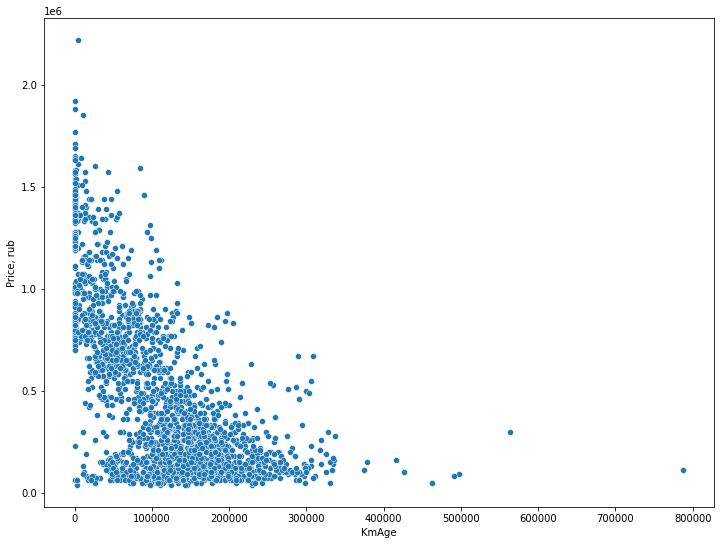

In [15]:
fix, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(df['KmAge'],df['Price, rub'], ax=ax)

Мы видим тенденцию к снижению цены вместе с количеством пройденных километров

In [16]:
sps.pearsonr(df['KmAge'],df['Price, rub'])

(-0.6341856362309933, 5.66438384201963e-214)

D:\Python\Environments\MainEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CarAge', ylabel='Price, rub'>

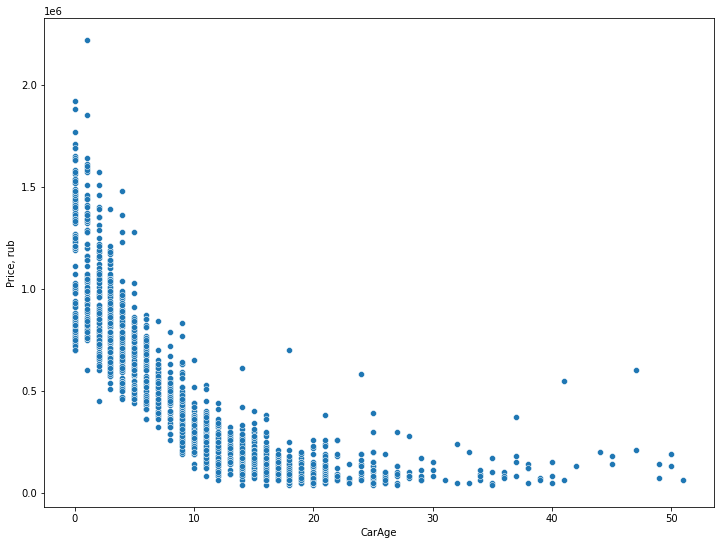

In [17]:
fix, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(df['CarAge, years'],df['Price, rub'], ax=ax)

То же самое можно сказать о зависимости между возрастом автомобиля и ценой. Довольно сильная корреляция

In [18]:
sps.pearsonr(df['CarAge, years'],df['Price, rub'])

(-0.7719837725978045, 0.0)

<AxesSubplot:xlabel='GearBox', ylabel='Count'>

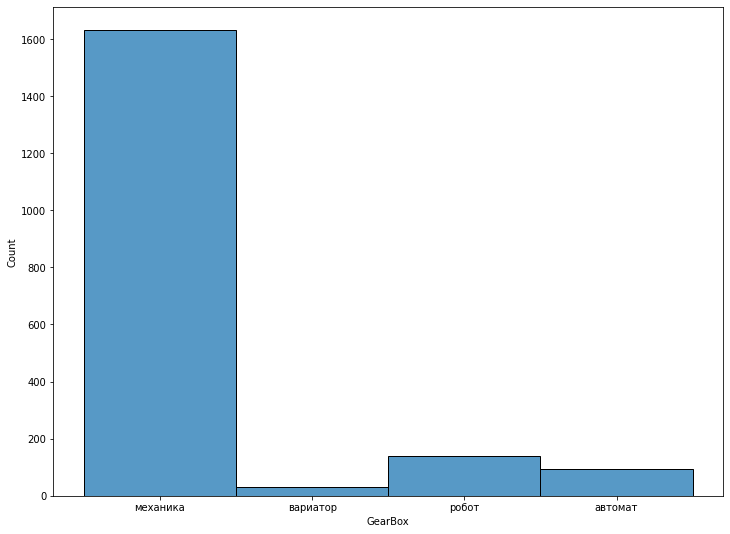

In [19]:
fix, ax = plt.subplots(figsize=(12,9))
sns.histplot(df['GearBox'], ax = ax)

Как видим, в основном у вазов механическая коробка передач

In [20]:
df['CarType'].value_counts()

седан                   823
хэтчбек 5 дв.           438
универсал 5 дв.         268
внедорожник 3 дв.       162
лифтбек                 107
внедорожник 5 дв.        45
хэтчбек 3 дв.            40
фургон                   12
пикап двойная кабина      1
компактвэн                1
Name: CarType, dtype: int64

<AxesSubplot:xlabel='CarType', ylabel='Count'>

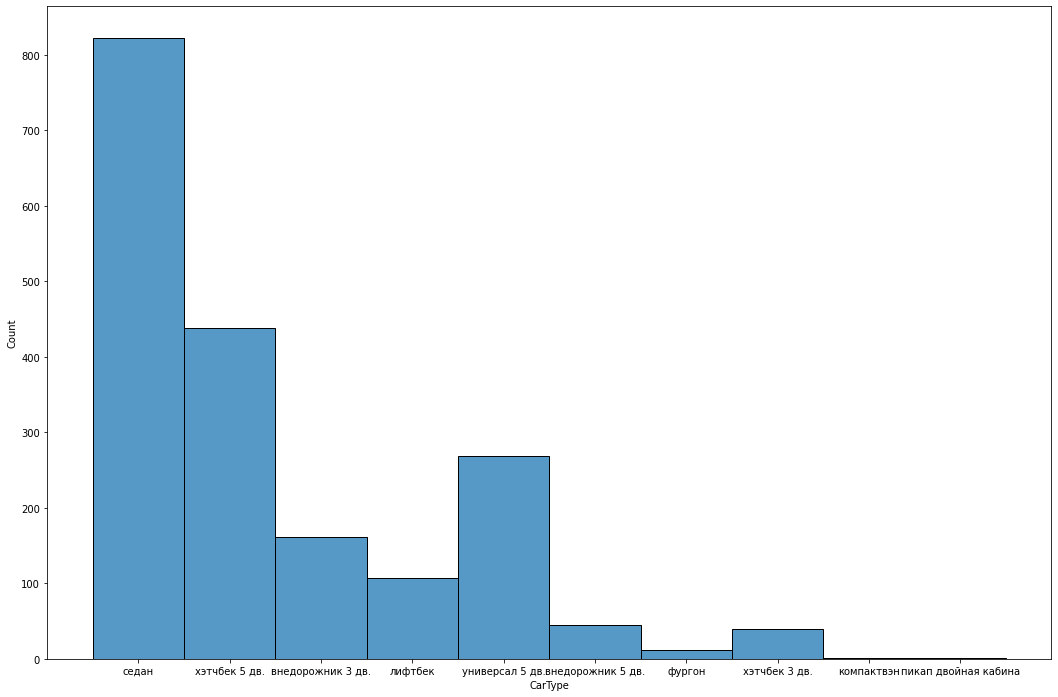

In [21]:
fix, ax = plt.subplots(figsize=(18,12))
sns.histplot(df['CarType'], ax = ax)

Значительная часть вазов является седаном

<AxesSubplot:xlabel='FuelType', ylabel='Count'>

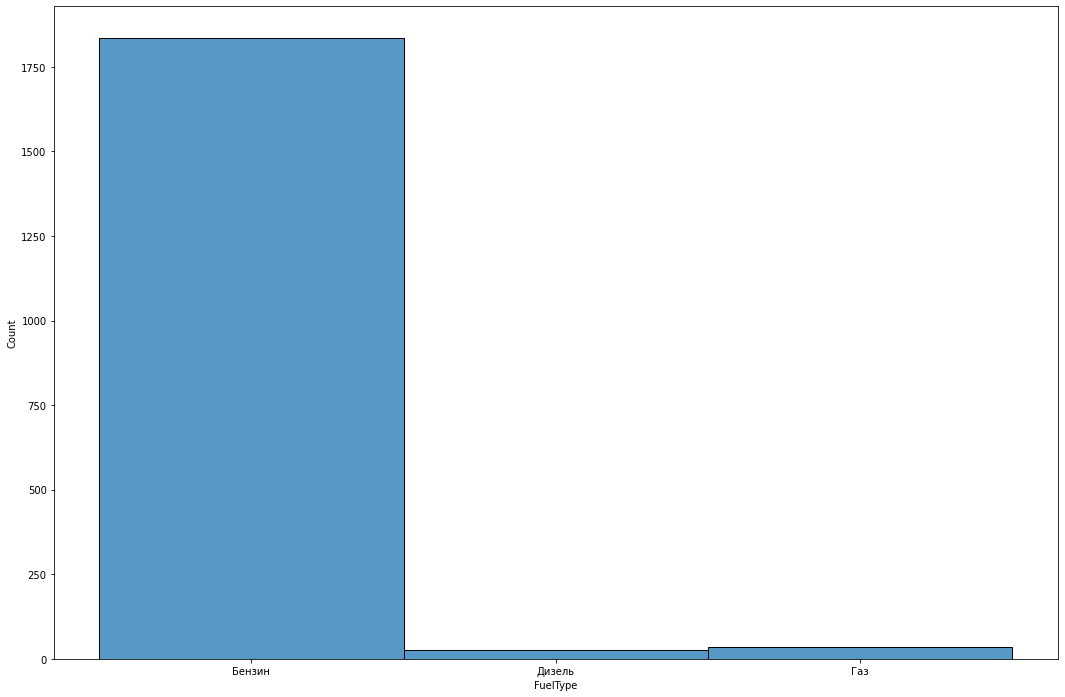

In [22]:
fix, ax = plt.subplots(figsize=(18,12))
sns.histplot(df['FuelType'], ax = ax)

Подавляющее большинство работает на бензине

In [23]:
df['EngineVolume'].value_counts()

1.6    1262
1.5     215
1.7     156
1.8     116
1.3      58
1.9      25
1.4      22
1.2      16
2.0      10
1.1       7
0.7       4
3.0       3
0.8       2
1.0       1
Name: EngineVolume, dtype: int64

<AxesSubplot:xlabel='EngineVolume', ylabel='Count'>

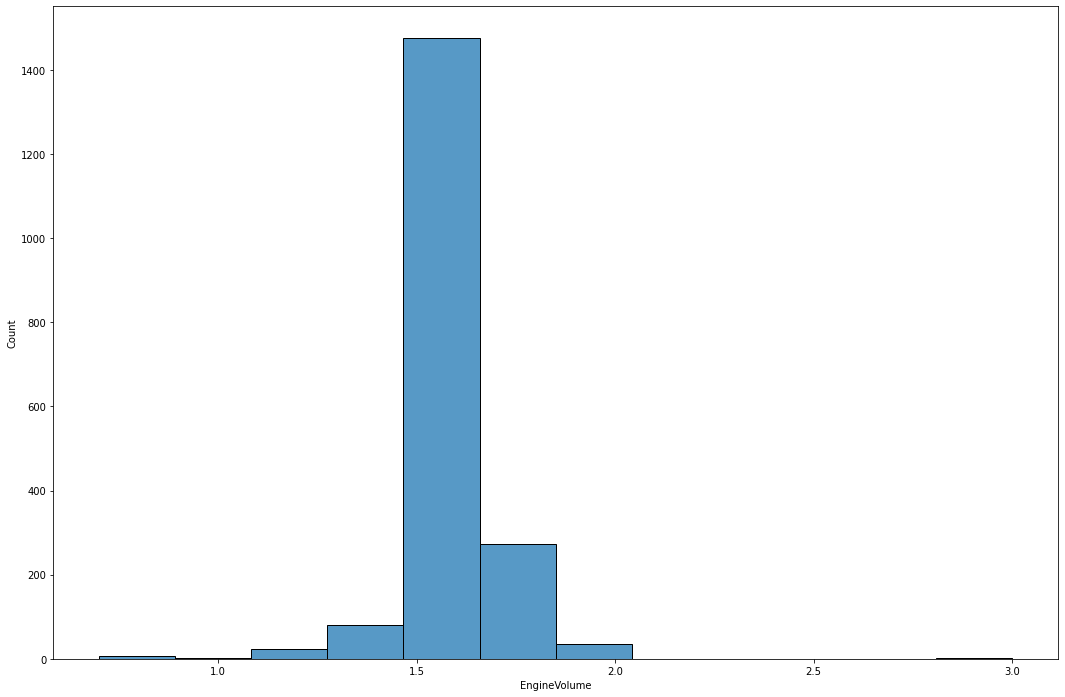

In [24]:
fix, ax = plt.subplots(figsize=(18,12))
sns.histplot(df['EngineVolume'], ax = ax)

D:\Python\Environments\MainEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineVolume', ylabel='Price, rub'>

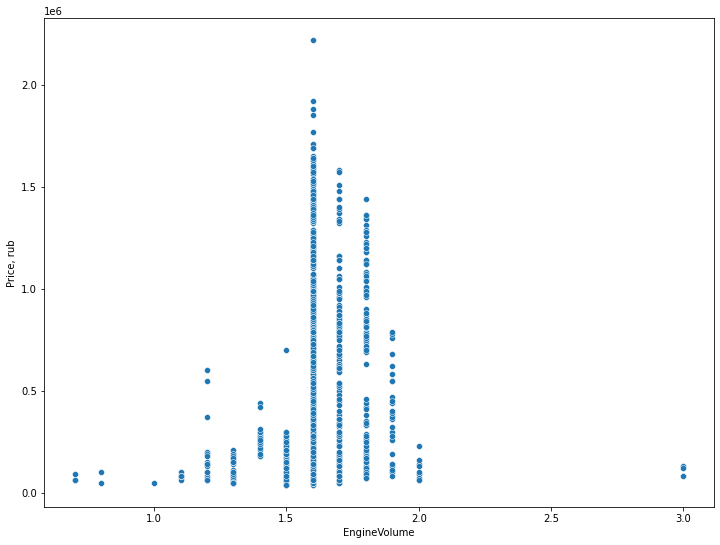

In [25]:
fix, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(df['EngineVolume'],df['Price, rub'], ax=ax)

В целом есть зависимость между обьемом двигателя и ценой

In [26]:
sps.pearsonr(df['EngineVolume'],df['Price, rub'])

(0.2394505864411346, 3.829175778144693e-26)

Распределие автомобилей по мощности двигателя в л.с

<AxesSubplot:xlabel='HorsePower', ylabel='Count'>

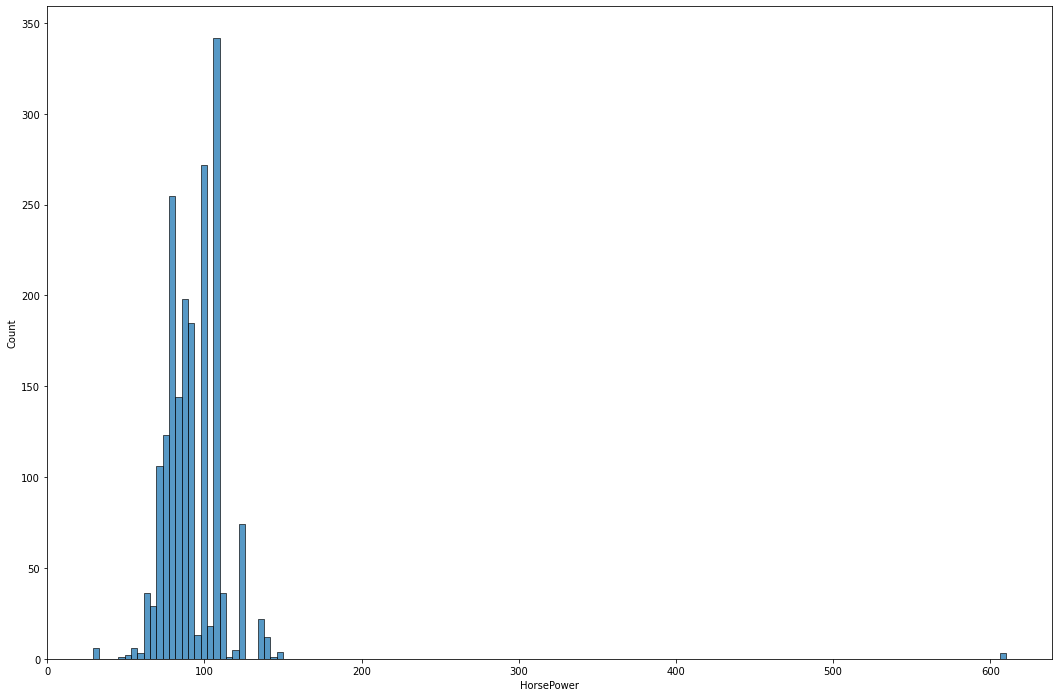

In [27]:
fix, ax = plt.subplots(figsize=(18,12))
sns.histplot(df['HorsePower'], ax = ax)

D:\Python\Environments\MainEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HorsePower', ylabel='Price, rub'>

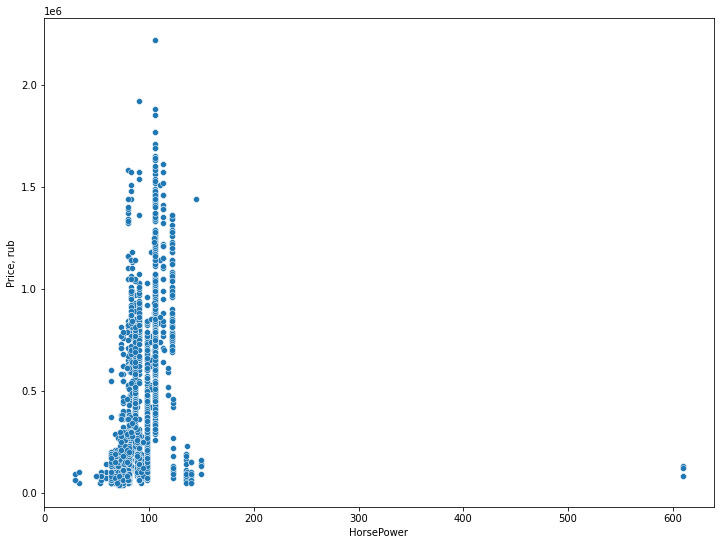

In [28]:
fix, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(df['HorsePower'],df['Price, rub'], ax=ax)

Здесь уже нет сильной зависимости между ценой и мощностью двигателя

In [29]:
sps.pearsonr(df['HorsePower'],df['Price, rub'])

(0.23864122501390092, 5.66796459528673e-26)

In [30]:
df['Place'].value_counts()

Уфа                          773
Стерлитамак (120км отУфы)    149
Салават (150км отУфы)        112
Мелеуз (190км отУфы)         111
Октябрьский (160км отУфы)     64
                            ... 
Какре-Елга (190км отУфы)       1
Бакалы (140км отУфы)           1
Кулгунино (140км отУфы)        1
Федоровка                      1
Нугуш (190км отУфы)            1
Name: Place, Length: 163, dtype: int64

В основном в Башкирии машины продаются в Уфе

Наиболее часто встречаемые марки автомобилей

In [31]:
df['Name'].value_counts()

LADA (ВАЗ) Granta I Рестайлинг    213
LADA (ВАЗ) Granta I               158
LADA (ВАЗ) 2114                   142
LADA (ВАЗ) Kalina I               112
LADA (ВАЗ) Priora I               112
                                 ... 
LADA (ВАЗ) 1111 Ока Астро           1
LADA (ВАЗ) 2329                     1
LADA (ВАЗ) Kalina Sport I           1
LADA (ВАЗ) 2120 Надежда I           1
LADA (ВАЗ) 2105 21053-20            1
Name: Name, Length: 77, dtype: int64

Теперь посмотрим на распределение цен автомобилей

<AxesSubplot:xlabel='Price, rub', ylabel='Count'>

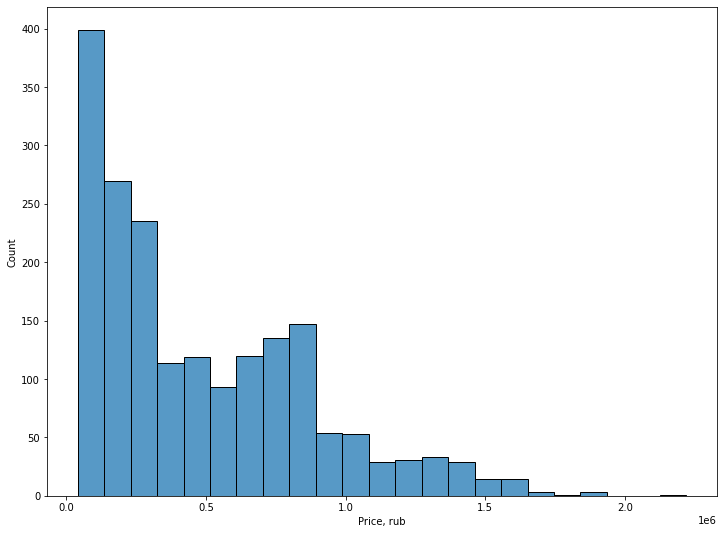

In [32]:
fix, ax = plt.subplots(figsize=(12,9))
sns.histplot(df['Price, rub'], ax = ax)

In [33]:
print("Минимальная цена: {} руб".format(np.min(df['Price, rub'])))
print("Максимальная цена: {} руб".format(np.max(df['Price, rub'])))
print("Средняя цена: {} руб".format(np.mean(df['Price, rub'])))
print("Медианная цена: {} руб".format(np.median(df['Price, rub'])))

Минимальная цена: 40000 руб
Максимальная цена: 2220000 руб
Средняя цена: 484322.61465471797 руб
Медианная цена: 360000.0 руб


<AxesSubplot:xlabel='Year', ylabel='Count'>

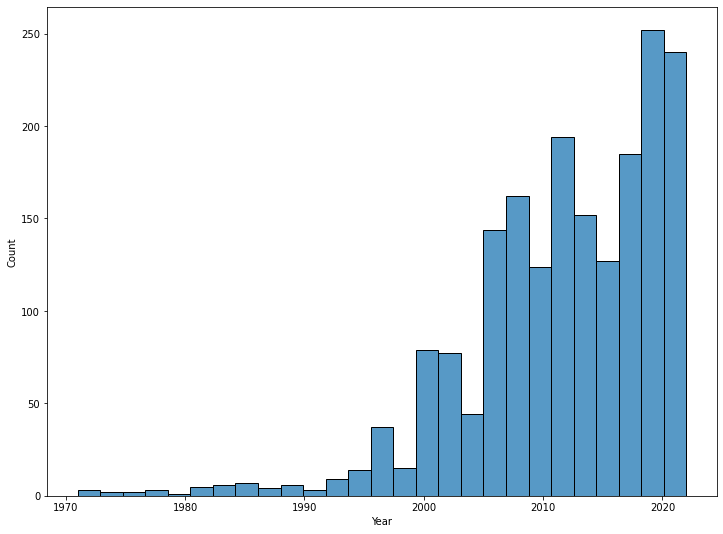

In [34]:
fix, ax = plt.subplots(figsize=(12,9))
sns.histplot(df['Year'], ax = ax)

Распределие автомобилей по году выпуска

D:\Python\Environments\MainEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineVolume', ylabel='HorsePower'>

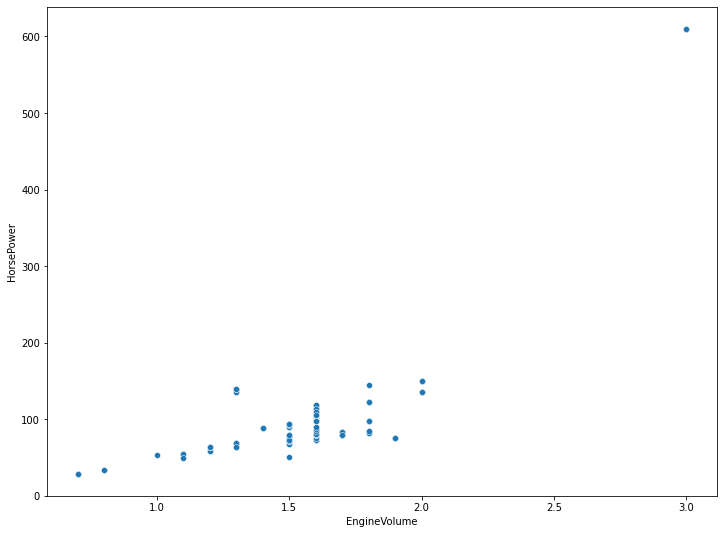

In [35]:
fix, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(df['EngineVolume'],df['HorsePower'], ax=ax)

In [36]:
sps.pearsonr(df['EngineVolume'],df['HorsePower'])

(0.526283284370396, 1.2289747603068821e-135)

Между объемом двигателя и мощностью явно существует сильная корреляция